In [14]:
"""
    PCA analysis of galaxy mergers classification dataset
    In the following analysis, the images of training set have been used
    and resized to 64x64 resolution.
    
"""
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [15]:
# load already resized data
train_data_path = "data/npy_64x64/train_data.npy"
train_label_path = "data/npy_64x64/train_labels.npy"
train_data = np.load(train_data_path)
train_labels = np.load(train_label_path)
classes = ["merger", "non_interacting"]


loaded data


In [16]:
# PCA
def preprocess_data(data, scale_data=False):
    data = data.reshape(data.shape[0], -1)
    if scale_data:
        data = StandardScaler().fit_transform(data)
    return data


def apply_pca(data, number_of_components, batch_size=None):
    pca_class = IncrementalPCA(
        number_of_components, batch_size=batch_size)
    return pca_class, pca_class.fit_transform(
        data)


def plot_scatter_2d(plot_data, labels, class_mapping):
    scatter_plot = plt.scatter(plot_data[:, 0], plot_data[:, 1], c=labels,
                cmap=plt.cm.get_cmap("RdYlBu", 2), alpha=0.3)
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
    plt.legend(handles=scatter_plot.legend_elements()[0], labels=class_mapping)
    plt.show()

    
def plot_scatter_3d(plot_data, labels, class_mapping):
    fig = plt.figure()
    ax = Axes3D(fig)
    scatter_plot = ax.scatter(
        plot_data[:, 0], plot_data[:, 1], plot_data[:, 2],
        c=labels, cmap=plt.cm.get_cmap("RdYlBu", 2), alpha=0.3)
    ax.set_xlabel('Principal component 1')
    ax.set_ylabel('Principal component 2')
    ax.set_zlabel('Principal component 3')
    ax.legend(handles=scatter_plot.legend_elements()[0], labels=class_mapping)
    plt.show()

In [17]:
train_data_scaled = preprocess_data(train_data, scale_data=True)

Components:  [[ 0.00427978  0.00493612  0.00505029 ...  0.00420328  0.00460889
   0.00537482]
 [ 0.00631519  0.00809621  0.00992706 ... -0.00418023 -0.00466596
  -0.00630349]]
Explained variance:  [2075.08913932  436.38756503]
Percentage of explained variance:  [0.16885009 0.03550887]


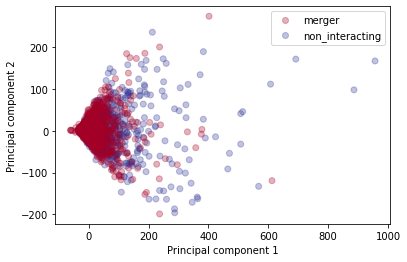

In [19]:
pca_class, pca_with_2_components = apply_pca(train_data_scaled, 2, 10)
print("Components: ", pca_class.components_)
print("Explained variance: ", pca_class.explained_variance_)
print("Percentage of explained variance: ", pca_class.explained_variance_ratio_)
plot_scatter_2d(pca_with_2_components, train_labels, classes)


Components:  [[ 0.00426366  0.00491677  0.00503809 ...  0.00421632  0.00462343
   0.00538738]
 [ 0.00645506  0.00782023  0.00928344 ... -0.00480992 -0.0057017
  -0.00739032]
 [-0.00313711 -0.00438326 -0.00552265 ...  0.00138465  0.00132007
   0.00197613]]
Explained variance:  [2076.12346167  481.70688524  417.56290148]
Percentage of explained variance:  [0.16893425 0.03919651 0.03397711]


<ipython-input-16-8e521897132b>:27: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


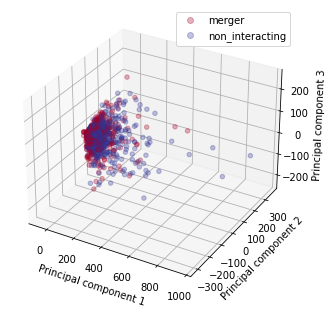

In [20]:
pca_class, pca_with_3_components = apply_pca(train_data_scaled, 3, 10)
print("Components: ", pca_class.components_)
print("Explained variance: ", pca_class.explained_variance_)
print("Percentage of explained variance: ", pca_class.explained_variance_ratio_)
plot_scatter_3d(pca_with_3_components, train_labels, classes)

/home/manu/venvs/resspect_3.9/lib/python3.9/site-packages/sklearn/decomposition/_incremental_pca.py:316: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/home/manu/venvs/resspect_3.9/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Propotion of explained variance')

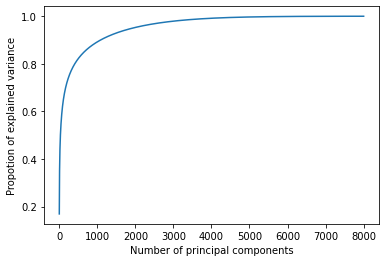

In [22]:
pca_class, pca_with_n_components = apply_pca(train_data_scaled, train_data_scaled.shape[0], 10)
plt.plot(np.cumsum(pca_class.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Propotion of explained variance')